In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima.utils import ndiffs

In [2]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(demand):
    result=adfuller(demand)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")



In [3]:
path = '<Insert PATH Here>'
os.chdir(path)

In [4]:
df = pd.read_csv('NY_FL_flight_demand.csv')
df

,search_date,origin_airport_code,origin_city,origin_region,origin_country,dest_airport_code,destination_city,destination_region,destination_country,flight_demand
0,05-06-16,ECP,Panama City,FL,US,DEN,Denver,CO,US,135
1,05-06-16,MIA,Miami,FL,US,BOS,Boston,MA,US,3909
2,05-06-16,PGD,Punta Gorda,FL,US,JFK,New York,NY,US,15
3,05-06-16,JAX,Jacksonville,FL,US,WAS,Washington,DC,US,943
4,05-06-16,EYW,Key West,FL,US,CLT,Charlotte,NC,US,67
...,...,...,...,...,...,...,...,...,...,...
694912,23-05-16,HPN,White Plains,NY,US,RDU,Raleigh,NC,US,119
694913,23-05-16,HPN,White Plains,NY,US,PBI,West Palm Beach,FL,US,1168
694914,23-05-16,IAG,Niagara Falls,NY,US,SAN,San Diego,CA,US,7
694915,23-05-16,BGM,Binghamton,NY,US,TPA,Tampa,FL,US,67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694917 entries, 0 to 694916
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   search_date          694917 non-null  object
 1   origin_airport_code  694917 non-null  object
 2   origin_city          694917 non-null  object
 3   origin_region        694917 non-null  object
 4   origin_country       694917 non-null  object
 5   dest_airport_code    694917 non-null  object
 6   destination_city     694917 non-null  object
 7   destination_region   694917 non-null  object
 8   destination_country  694917 non-null  object
 9   flight_demand        694917 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 53.0+ MB


In [6]:
# Transform 'search_date' to datetime data type
df['search_date'] = pd.to_datetime(df['search_date'])
df['search_date']

0        2016-05-06
1        2016-05-06
2        2016-05-06
3        2016-05-06
4        2016-05-06
            ...    
694912   2016-05-23
694913   2016-05-23
694914   2016-05-23
694915   2016-05-23
694916   2016-05-23
Name: search_date, Length: 694917, dtype: datetime64[ns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694917 entries, 0 to 694916
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   search_date          694917 non-null  datetime64[ns]
 1   origin_airport_code  694917 non-null  object        
 2   origin_city          694917 non-null  object        
 3   origin_region        694917 non-null  object        
 4   origin_country       694917 non-null  object        
 5   dest_airport_code    694917 non-null  object        
 6   destination_city     694917 non-null  object        
 7   destination_region   694917 non-null  object        
 8   destination_country  694917 non-null  object        
 9   flight_demand        694917 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 53.0+ MB


In [8]:
df.describe()

,flight_demand
count,694917.000000
mean,1159.990747
std,3445.337103
min,7.000000
25%,46.000000
50%,183.000000
75%,880.000000
max,188365.000000


In [9]:
dfMonthlyDemand = df[['search_date','flight_demand']]
dfMonthlyDemand = dfMonthlyDemand.resample('M', on='search_date').sum()
dfMonthlyDemand

,flight_demand
search_date,
2016-01-31,10359115
2016-02-29,9830067
2016-03-31,30421605
2016-04-30,27017529
2016-05-31,28409076
2016-06-30,28313904
2016-07-31,28961619
2016-08-31,27561289
2016-09-30,26471831


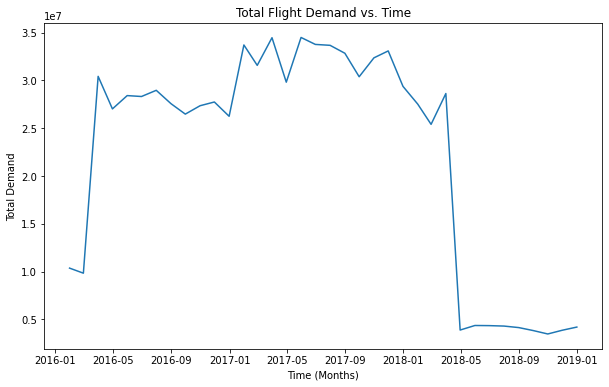

In [10]:
x_axis = dfMonthlyDemand.index.values
y_axis = dfMonthlyDemand['flight_demand'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis)
plt.title('Total Flight Demand vs. Time')
plt.xlabel('Time (Months)')
plt.ylabel('Total Demand')
plt.show()

Based on plot, will limit data to the 24 month period between 2016-03 and 2018-03

In [11]:
df = df[(df['search_date'] >= '2016-03-01') & (df['search_date'] <= '2018-03-01')]

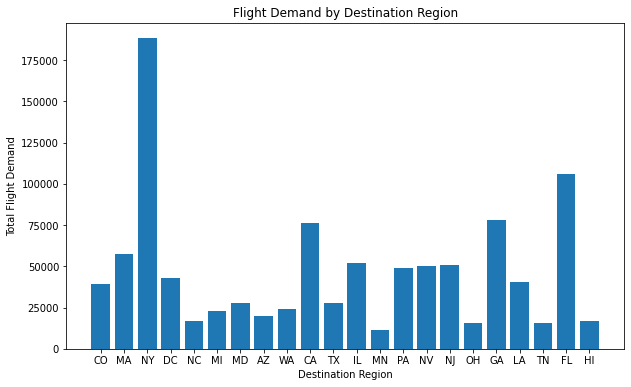

In [12]:
x_axis = df.destination_region
y_axis = df.flight_demand

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.title('Flight Demand by Destination Region')
plt.xlabel('Destination Region')
plt.ylabel('Total Flight Demand')
plt.show()

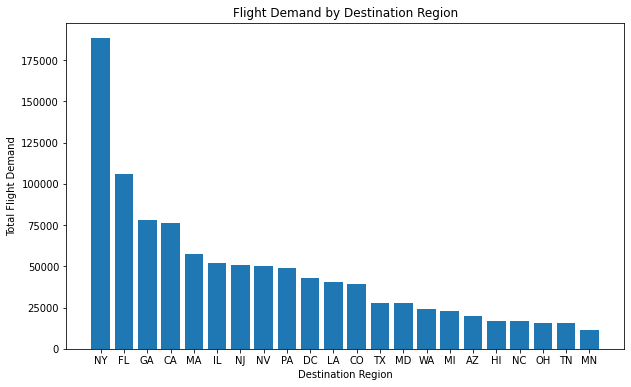

In [13]:
df_sort = df.sort_values('flight_demand', ascending=False)
x_axis = df_sort.destination_region
y_axis = df_sort.flight_demand

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.title('Flight Demand by Destination Region')
plt.xlabel('Destination Region')
plt.ylabel('Total Flight Demand')
plt.show()

Data demonstrates that the top 5 destinations with the highest demand are NY, FL, GA, CA, and IL

In [14]:
# Resample data from daily to monthly and plot 24 month demand for top 5 regions

dfMonthlyDemand = df[['search_date','flight_demand', 'destination_region']]

dfMonthlyDemand_NY = dfMonthlyDemand[(dfMonthlyDemand['destination_region'] == 'NY')]
dfMonthlyDemand_FL = dfMonthlyDemand[(dfMonthlyDemand['destination_region'] == 'FL')]
dfMonthlyDemand_GA = dfMonthlyDemand[(dfMonthlyDemand['destination_region'] == 'GA')]
dfMonthlyDemand_CA = dfMonthlyDemand[(dfMonthlyDemand['destination_region'] == 'CA')]
dfMonthlyDemand_IL = dfMonthlyDemand[(dfMonthlyDemand['destination_region'] == 'IL')]
dfMonthlyDemand_NY

,search_date,flight_demand,destination_region
2,2016-05-06,15,NY
6,2016-05-06,10467,NY
16,2016-05-06,98,NY
20,2016-05-06,105,NY
23,2016-05-06,120,NY
...,...,...,...
694488,2016-05-23,1116,NY
694496,2016-05-23,2846,NY
694512,2016-05-23,74,NY
694518,2016-05-23,5738,NY


In [15]:
# For each region, resample from daily to monthly data and drop the destination region 

dfMonthlyDemand_NY = dfMonthlyDemand_NY.resample('M', on='search_date').sum()
print(dfMonthlyDemand_NY)
#dfMonthlyDemand_NY = dfMonthlyDemand_NY.drop('destination_region', axis=1)

dfMonthlyDemand_FL = dfMonthlyDemand_FL.resample('M', on='search_date').sum()
#dfMonthlyDemand_FL = dfMonthlyDemand_FL.drop(columns=['destination_region'])

dfMonthlyDemand_GA = dfMonthlyDemand_GA.resample('M', on='search_date').sum()
#dfMonthlyDemand_GA = dfMonthlyDemand_GA.drop(columns=['destination_region'])

dfMonthlyDemand_CA = dfMonthlyDemand_CA.resample('M', on='search_date').sum()
#dfMonthlyDemand_CA = dfMonthlyDemand_CA.drop(columns=['destination_region'])

dfMonthlyDemand_IL = dfMonthlyDemand_IL.resample('M', on='search_date').sum()
#dfMonthlyDemand_IL = dfMonthlyDemand_IL.drop(columns=['destination_region'])


             flight_demand
search_date               
2016-03-31         2589573
2016-04-30         2355149
2016-05-31         2431319
2016-06-30         2415841
2016-07-31         2435633
2016-08-31         2436325
2016-09-30         2240970
2016-10-31         2333278
2016-11-30         2419141
2016-12-31         2352114
2017-01-31         2651160
2017-02-28         2609457
2017-03-31         2874994
2017-04-30         2546265
2017-05-31         3151490
2017-06-30         3095694
2017-07-31         3170412
2017-08-31         3133852
2017-09-30         2587395
2017-10-31         2851828
2017-11-30         2915031
2017-12-31         2610517
2018-01-31         2071026
2018-02-28         2084430
2018-03-31          134819


In [16]:
dfMonthlyDemand_FL

,flight_demand
search_date,
2016-03-31,6065989
2016-04-30,4913092
2016-05-31,4842570
2016-06-30,4844267
2016-07-31,5244321
2016-08-31,4919664
2016-09-30,4988517
2016-10-31,5135780
2016-11-30,5456702


In [17]:
# combine into one monthly flight demand by destination dataframe

dfMonthlyDemand_Top5 = pd.DataFrame()
dfMonthlyDemand_Top5['search_date'] = dfMonthlyDemand_NY.index.values
dfMonthlyDemand_Top5['flight_demand_NY'] = dfMonthlyDemand_NY['flight_demand'].to_numpy()
dfMonthlyDemand_Top5['flight_demand_FL'] = dfMonthlyDemand_FL['flight_demand'].to_numpy()
dfMonthlyDemand_Top5['flight_demand_GA'] = dfMonthlyDemand_GA['flight_demand'].to_numpy()
dfMonthlyDemand_Top5['flight_demand_CA'] = dfMonthlyDemand_CA['flight_demand'].to_numpy()
dfMonthlyDemand_Top5['flight_demand_IL'] = dfMonthlyDemand_IL['flight_demand'].to_numpy()

dfMonthlyDemand_Top5

,search_date,flight_demand_NY,flight_demand_FL,flight_demand_GA,flight_demand_CA,flight_demand_IL
0,2016-03-31,2589573,6065989,1433712,5222791,2235937
1,2016-04-30,2355149,4913092,1326323,4836962,2051443
2,2016-05-31,2431319,4842570,1365793,5367152,2221010
3,2016-06-30,2415841,4844267,1414106,5329779,2204777
4,2016-07-31,2435633,5244321,1475358,5255521,2239815
5,2016-08-31,2436325,4919664,1371173,4742500,2112056
6,2016-09-30,2240970,4988517,1348899,4576256,1950147
7,2016-10-31,2333278,5135780,1375997,4814805,2073885
8,2016-11-30,2419141,5456702,1358646,4964465,1828701
9,2016-12-31,2352114,5573501,1207697,4443174,1650795


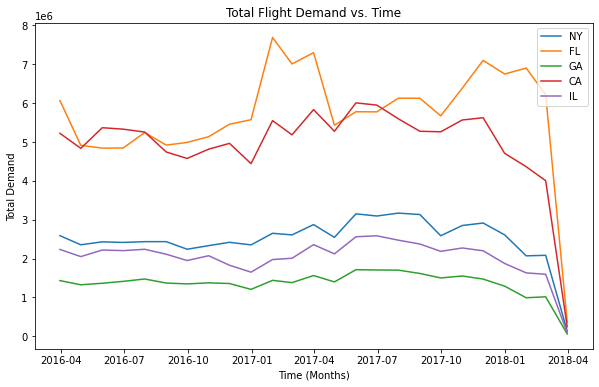

In [18]:
plt.figure(figsize=(10, 6))

x = dfMonthlyDemand_Top5.search_date
y1 = dfMonthlyDemand_Top5.flight_demand_NY
y2 = dfMonthlyDemand_Top5.flight_demand_FL
y3 = dfMonthlyDemand_Top5.flight_demand_GA
y4 = dfMonthlyDemand_Top5.flight_demand_CA
y5 = dfMonthlyDemand_Top5.flight_demand_IL

# Plot NY Flight Demand 
plt.plot(x, y1, label = 'NY')

# Plot FL Flight Demand 
plt.plot(x, y2, label = 'FL')

# Plot GA Flight Demand 
plt.plot(x, y3, label = 'GA')

# Plot CA Flight Demand 
plt.plot(x, y4, label = 'CA')

# Plot IL Flight Demand 
plt.plot(x, y5, label = 'IL')

plt.title('Total Flight Demand vs. Time')
plt.xlabel('Time (Months)')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

Chart shows that flight demand to NY, IL, and GA is fairly stable. However, California, and especially Florida, is comparably more seasonal. 

Redoing model with data NY to FL and FL to NY

In [19]:
df2 = df[['search_date', 'origin_region', 'destination_region', 'flight_demand']]
df2 = df2[((df2['origin_region'] == 'FL') | (df2['origin_region'] == 'NY')) & ((df2['destination_region'] == 'FL') | (df2['destination_region'] == 'NY'))]
df2 = df2.reset_index(drop=True)
df2

,search_date,origin_region,destination_region,flight_demand
0,2016-05-06,FL,NY,15
1,2016-05-06,FL,NY,10467
2,2016-05-06,FL,NY,98
3,2016-05-06,FL,NY,105
4,2016-05-06,FL,NY,120
...,...,...,...,...
123367,2016-05-23,NY,FL,112
123368,2016-05-23,NY,FL,10091
123369,2016-05-23,NY,FL,1108
123370,2016-05-23,NY,FL,1168


In [20]:
# Validate that there are only two pairings of origin-destination

concats = []
for index, row in df2.iterrows():
    cnct = str(row['origin_region'] + row['destination_region'])
    concats.append(cnct)

myset = set(concats)
print(myset)

{'NYFL', 'FLNY'}


In [21]:
# Separate into two separte dataframes

dfNYFL = df2[df2['origin_region'] == 'NY'].reset_index(drop=True)
dfFLNY = df2[df2['origin_region'] == 'FL'].reset_index(drop=True)

In [22]:
dfNYFL = dfNYFL.resample('D', on='search_date').sum()
print(dfNYFL)
#dfNYFL = dfNYFL.drop(columns=['origin_region','destination_region'])

dfFLNY = dfFLNY.resample('D', on='search_date').sum()
#dfFLNY = dfFLNY.drop(columns=['origin_region','destination_region'])

             flight_demand
search_date               
2016-03-03          283547
2016-03-04          198268
2016-03-05          212365
2016-03-06          138527
2016-03-07          103835
...                    ...
2018-02-25          310043
2018-02-26          353539
2018-02-27          396842
2018-02-28          347395
2018-03-01          370065

[729 rows x 1 columns]


In [23]:
dfNYFL

,flight_demand
search_date,
2016-03-03,283547
2016-03-04,198268
2016-03-05,212365
2016-03-06,138527
2016-03-07,103835
...,...
2018-02-25,310043
2018-02-26,353539
2018-02-27,396842


In [24]:
dfFLNY.describe()

,flight_demand
count,729.000000
mean,85730.744856
std,45625.890995
min,0.000000
25%,72752.000000
50%,87612.000000
75%,97868.000000
max,691683.000000


In [25]:
dfNYFL_resampled = dfNYFL.resample('M').sum()
dfFLNY_resampled = dfFLNY.resample('M').sum()

Text(0.5, 1.0, 'FL to NY Monthly Flight Demand')

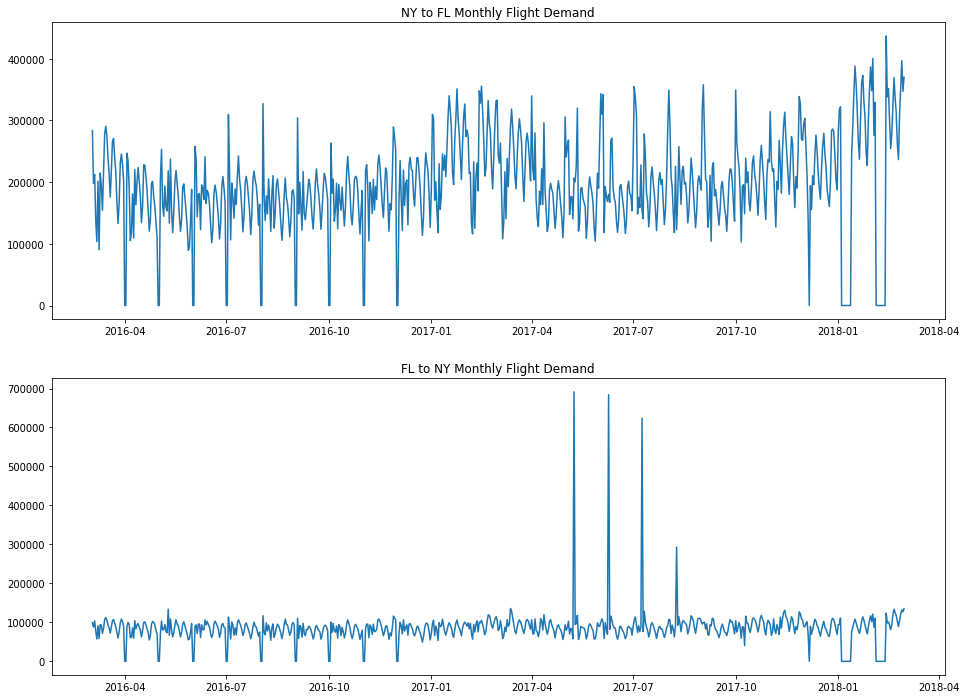

In [26]:
x = dfNYFL.index.values
y1 = dfNYFL.flight_demand
y2 = dfFLNY.flight_demand

fig, axs = plt.subplots(2, figsize = (16,12))
axs[0].plot(x, y1)
axs[0].set_title('NY to FL Monthly Flight Demand')
axs[1].plot(x, y2)
axs[1].set_title('FL to NY Monthly Flight Demand')

<Axes: ylabel='Density'>

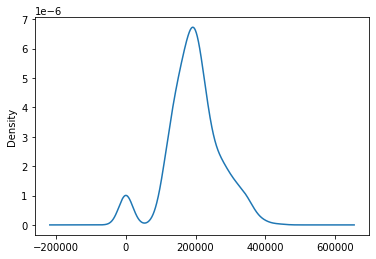

In [27]:
#Distribution of the dataset
dfNYFL.flight_demand.plot(kind='kde')

<Axes: ylabel='Density'>

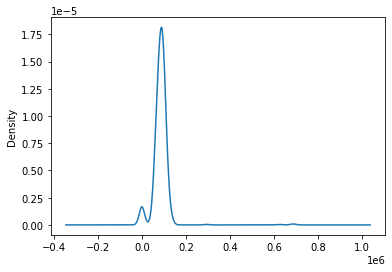

In [28]:
#Distribution of the dataset
dfFLNY.flight_demand.plot(kind='kde')

In [29]:
#Ho: Data is non stationary
#H1: Data is stationary

adfuller_test(dfNYFL.flight_demand.dropna())
print('-'*50)
adfuller_test(dfNYFL.flight_demand.diff().dropna())
print('-'*50)
adfuller_test(dfNYFL.flight_demand.diff().diff().dropna())

ADF Test Statistic : -8.021942147442363
p-value : 2.06509739487802e-12
#Lags Used : 4
Number of Observations Used : 724
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary
--------------------------------------------------
ADF Test Statistic : -12.205314063804089
p-value : 1.1973035510074233e-22
#Lags Used : 12
Number of Observations Used : 715
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary
--------------------------------------------------
ADF Test Statistic : -12.11192656615476
p-value : 1.9105783184377063e-22
#Lags Used : 20
Number of Observations Used : 706
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


In [30]:
# Using ndiffs to determine the number of differencing required
ndiffs(dfNYFL.flight_demand, test='adf')

0

In [31]:
#Ho: Data is non stationary
#H1: Data is stationary

adfuller_test(dfFLNY.flight_demand.dropna())
print('-'*50)
adfuller_test(dfFLNY.flight_demand.diff().dropna())
print('-'*50)
adfuller_test(dfFLNY.flight_demand.diff().diff().dropna())

ADF Test Statistic : -16.286402563485307
p-value : 3.372127585031317e-29
#Lags Used : 1
Number of Observations Used : 727
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary
--------------------------------------------------
ADF Test Statistic : -11.51187424981023
p-value : 4.240478728161501e-21
#Lags Used : 13
Number of Observations Used : 714
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary
--------------------------------------------------
ADF Test Statistic : -11.904554459947061
p-value : 5.474941639982701e-22
#Lags Used : 20
Number of Observations Used : 706
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


In [32]:
# Using ndiffs to determine the number of differencing required
ndiffs(dfNYFL.flight_demand, test='adf')

0

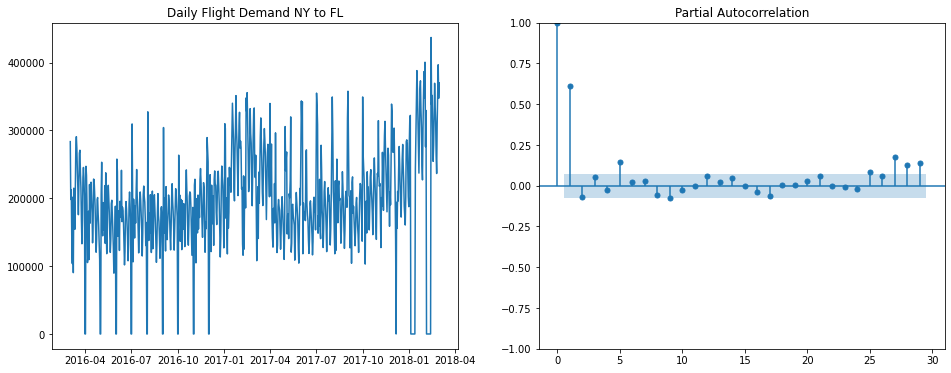

In [33]:
# Determinine p value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(dfNYFL.flight_demand)
ax1.set_title("Daily Flight Demand NY to FL")
ax2.set_ylim(0,1)
plot_pacf(dfNYFL.flight_demand, ax = ax2);

1 lag has the most significance, thus p = 1

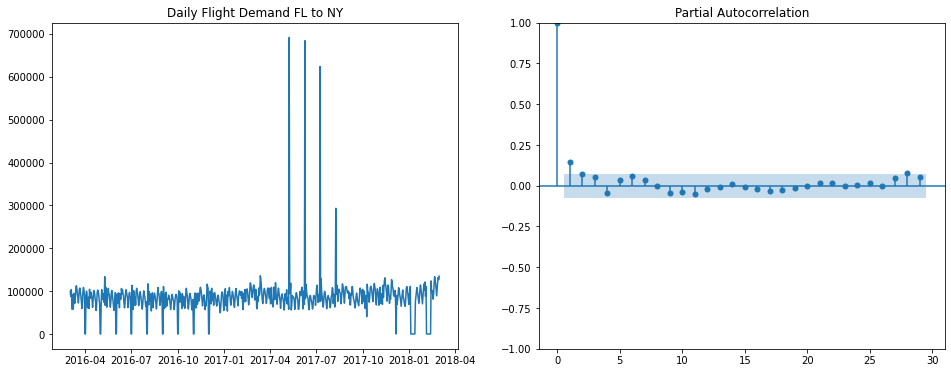

In [34]:
# Determinine p value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(dfFLNY.flight_demand)
ax1.set_title("Daily Flight Demand FL to NY")
ax2.set_ylim(0,1)
plot_pacf(dfFLNY.flight_demand, ax = ax2);

1 lag has the most significance, thus p = 1

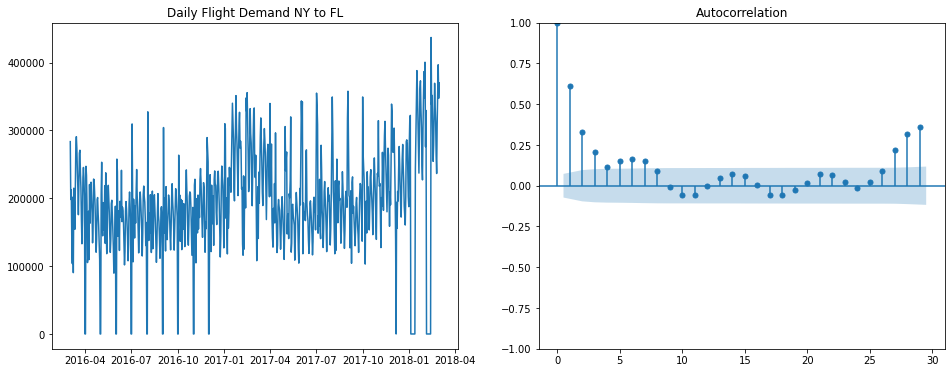

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(dfNYFL.flight_demand)
ax1.set_title("Daily Flight Demand NY to FL")
plot_acf(dfNYFL.flight_demand, ax = ax2);

q is 10 because we see that 10 lags cross the threshold

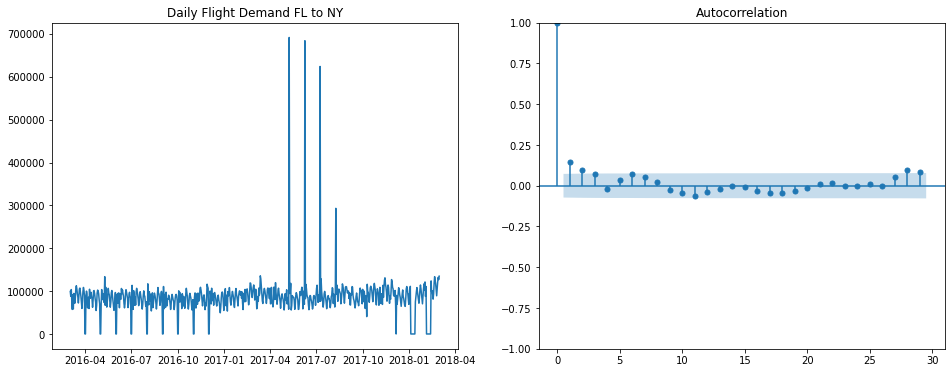

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

ax1.plot(dfFLNY.flight_demand)
ax1.set_title("Daily Flight Demand FL to NY")
plot_acf(dfFLNY.flight_demand, ax = ax2);

q is 10 because we see that 10 lags cross the threshold

In [37]:
# ARIMA Model NY - FL

model1 = ARIMA(dfNYFL.flight_demand, order = (1, 0, 10))
result1 = model1.fit()
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:          flight_demand   No. Observations:                  729
Model:                ARIMA(1, 0, 10)   Log Likelihood               -9034.712
Date:                Mon, 28 Aug 2023   AIC                          18095.423
Time:                        17:37:49   BIC                          18155.115
Sample:                    03-03-2016   HQIC                         18118.454
                         - 03-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.956e+05   6343.934     30.836      0.000    1.83e+05    2.08e+05
ar.L1          0.6546      0.864      0.757      0.449      -1.040       2.349
ma.L1          0.0032      0.864      0.004      0.9

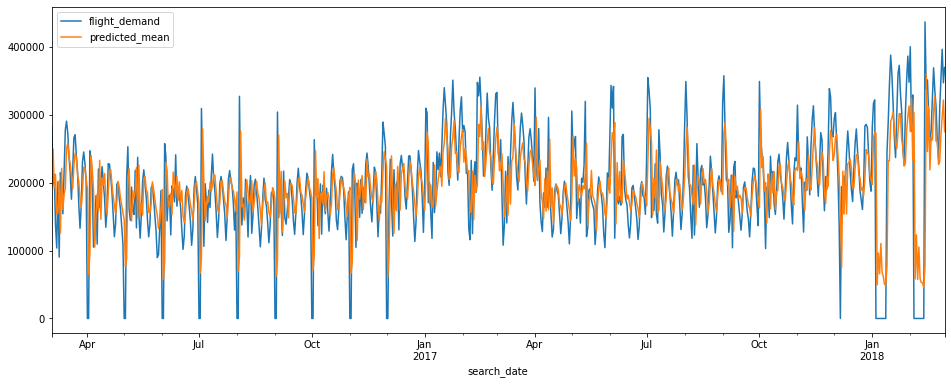

In [38]:
# Actual vs. Fitted

fig = plt.figure(figsize = (16,6))
dfNYFL.flight_demand.plot() #Actual
result1.predict(
    start = 0,
    end = 728,
    dynamic = False
).plot() #Fitted
plt.legend()


In [40]:
# ARIMA Model FL - NY

model2 = ARIMA(dfFLNY.flight_demand, order = (1, 0, 10))
result2 = model2.fit()
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:          flight_demand   No. Observations:                  729
Model:                ARIMA(1, 0, 10)   Log Likelihood               -8839.326
Date:                Mon, 28 Aug 2023   AIC                          17704.651
Time:                        17:38:27   BIC                          17764.343
Sample:                    03-03-2016   HQIC                         17727.682
                         - 03-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.573e+04   3160.546     27.125      0.000    7.95e+04    9.19e+04
ar.L1          0.7395      0.929      0.796      0.426      -1.081       2.560
ma.L1         -0.6119      0.930     -0.658      0.5

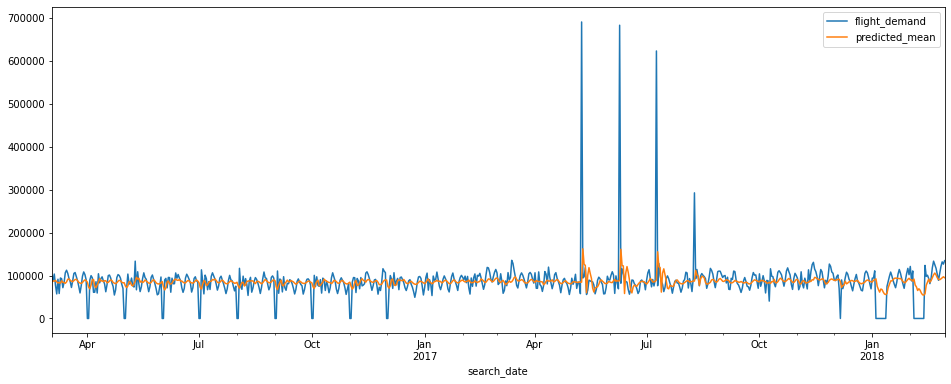

In [41]:
# Actual vs. Fitted

fig = plt.figure(figsize = (16,6))
dfFLNY.flight_demand.plot() #Actual
result2.predict(
    start = 0,
    end = 728,
    dynamic = False
).plot() #Fitted
plt.legend()
